In [290]:
# import all standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
data = pd.read_csv("housing.csv")
# commas are the default delimeter so not much more needed to add to this

In [292]:
# We see that clearly stuff needs to be scaled and that we have both textual input as well as numerical
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [293]:
data.info()
#This helps us take a look at how many null values there are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [294]:
# Now we will drop the NaN (Not a Number) entries
data.dropna()
newData = data.dropna()
#You can also do data.dropna(inplace=True) which will do an in place replacement and drop those entries

In [295]:
newData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [296]:
newData.info() # Don't want to work on all the data simultaneously bc we want to guage model performance

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [297]:
from sklearn.model_selection import train_test_split

X = newData.drop(['median_house_value'], axis=1) # Data frame without target variables
y = newData['median_house_value']

In [298]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [299]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
# specify how much data we are using for testing (in this case 20% for evaluating)
# test set is only after training and param tuning and now you want to test the actual model

In [301]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15746,-122.43,37.77,52.0,3944.0,1072.0,1913.0,973.0,2.9567,NEAR BAY,425000.0
2370,-119.57,36.70,34.0,1759.0,354.0,899.0,337.0,2.6823,INLAND,72900.0
14782,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,NEAR OCEAN,138900.0
11456,-118.00,33.66,25.0,4041.0,903.0,1689.0,784.0,4.2289,NEAR OCEAN,442700.0
894,-121.94,37.54,31.0,2537.0,382.0,1067.0,410.0,6.7599,<1H OCEAN,356000.0
...,...,...,...,...,...,...,...,...,...,...
1923,-120.79,38.83,15.0,1374.0,291.0,709.0,239.0,1.7222,INLAND,118500.0
1332,-121.88,38.00,22.0,721.0,117.0,367.0,129.0,5.3098,INLAND,151900.0
63,-122.30,37.81,52.0,1224.0,237.0,521.0,159.0,1.1910,NEAR BAY,76100.0
7564,-118.19,33.89,31.0,886.0,224.0,1154.0,247.0,2.1071,<1H OCEAN,99500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

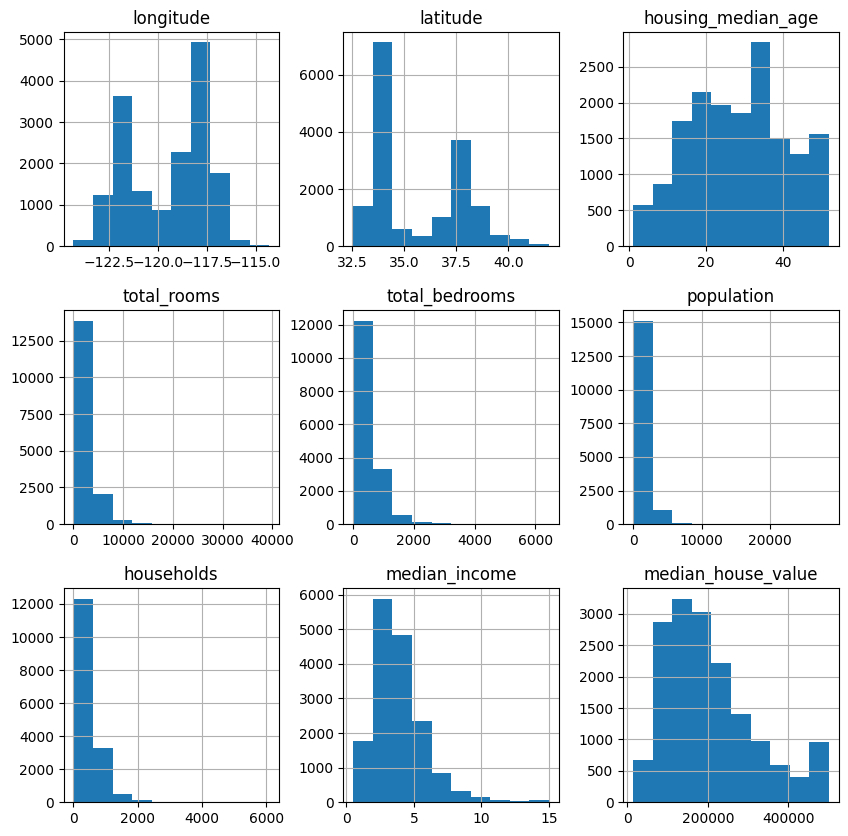

In [302]:
train_data.hist(figsize=(10, 10))

In [303]:
train_data.corr(numeric_only=True)
#So, train_data.corr(numeric_only=True) will give you a DataFrame containing the correlation coefficients between all pairs of numeric columns in the train_data DataFrame. 
# This is often used in data analysis and machine learning to understand the relationships between numeric variables in the dataset.
# I had to google this, apparently pandas deprecated a function that ignored any strings. 
# So now you need to specify if you only want numbers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924089,-0.104813,0.038634,0.061972,0.094507,0.049190,-0.010541,-0.041905
latitude,-0.924089,1.000000,0.008854,-0.033017,-0.062425,-0.107511,-0.067693,-0.084719,-0.148092
housing_median_age,-0.104813,0.008854,1.000000,-0.362135,-0.322534,-0.302968,-0.305113,-0.122215,0.099410
total_rooms,0.038634,-0.033017,-0.362135,1.000000,0.929818,0.863138,0.918911,0.201147,0.139352
total_bedrooms,0.061972,-0.062425,-0.322534,0.929818,1.000000,0.886332,0.980261,-0.006206,0.052659
population,0.094507,-0.107511,-0.302968,0.863138,0.886332,1.000000,0.914044,0.008151,-0.020142
households,0.049190,-0.067693,-0.305113,0.918911,0.980261,0.914044,1.000000,0.015038,0.068604
median_income,-0.010541,-0.084719,-0.122215,0.201147,-0.006206,0.008151,0.015038,1.000000,0.691977
median_house_value,-0.041905,-0.148092,0.099410,0.139352,0.052659,-0.020142,0.068604,0.691977,1.000000


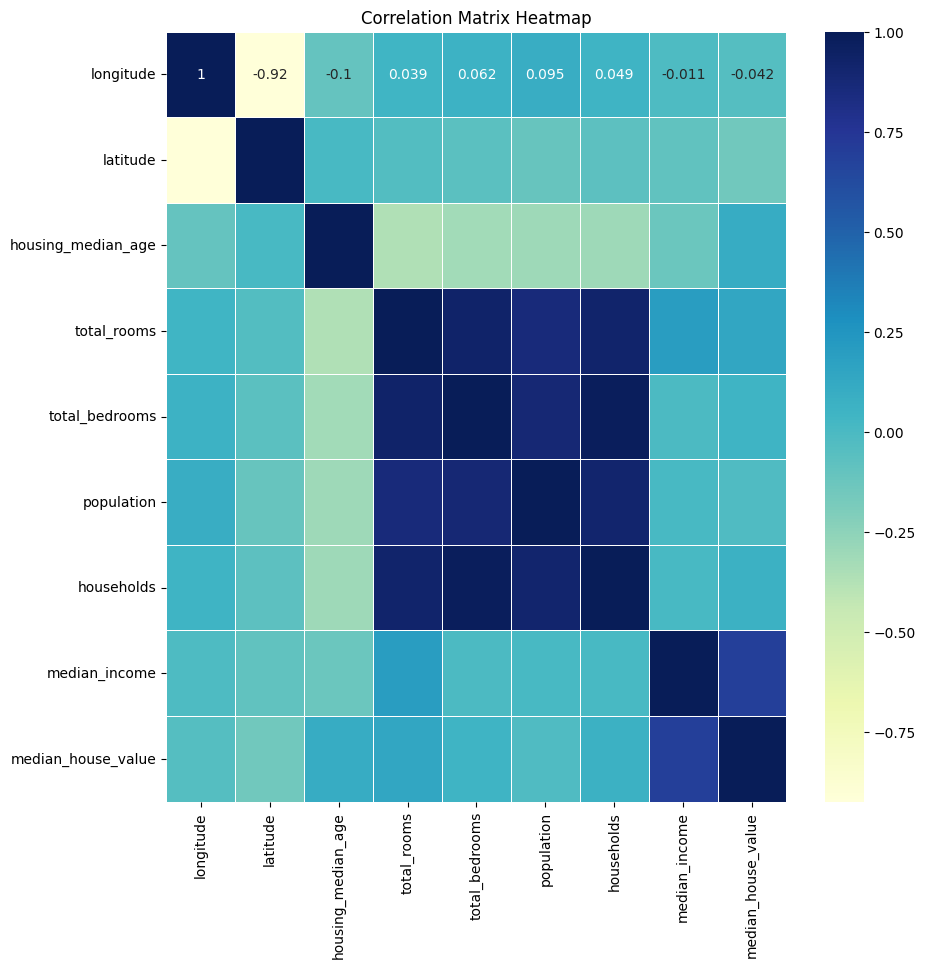

In [304]:
# Using a heat map to visualize the corrrelation matrix
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()
# If correlation is high positive it means it is very related if high negative it is very much the opposite
# Could not manage to get heatmap annotations to all 
# work even with size reduction, possibly look into changes for v2 to see what is wrong

In [337]:
# Trying to handle all extreme values
# Apply natural logarithm transformation to the 'total_rooms' column while adding 1 to handle zero values.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

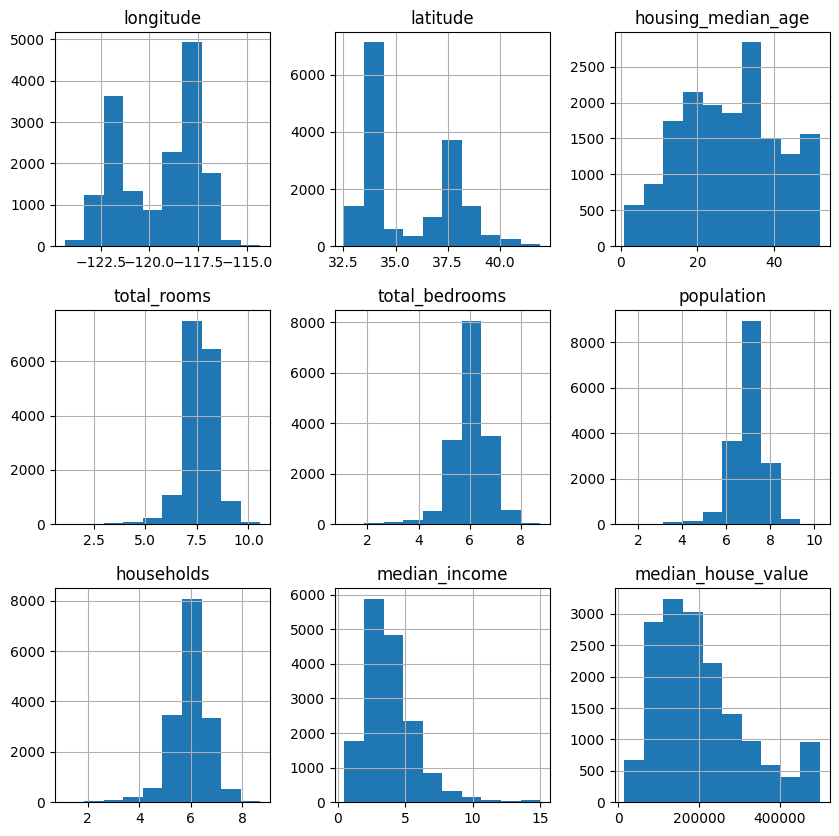

In [306]:
train_data.hist(figsize=(10, 10))
# Now we have something that looks a bit more like a gaussian distribution/bell curve

In [307]:
train_data.ocean_proximity.value_counts()
# Assign values of 1 or 0 to this column as we currently have string representations
# 1 is less than an hour from the ocean 0 is not

ocean_proximity
<1H OCEAN     7235
INLAND        5159
NEAR OCEAN    2129
NEAR BAY      1819
ISLAND           4
Name: count, dtype: int64

In [308]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15746,False,False,False,True,False
2370,False,True,False,False,False
14782,False,False,False,False,True
11456,False,False,False,False,True
894,True,False,False,False,False
...,...,...,...,...,...
1923,False,True,False,False,False
1332,False,True,False,False,False
63,False,False,False,True,False
7564,True,False,False,False,False


In [309]:
train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))
#Previously you would not need the as type int but in new pandas.dummies the output will be T or F otherwise

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15746,-122.43,37.77,52.0,8.280204,6.978214,7.556951,6.881411,2.9567,NEAR BAY,425000.0,0,0,0,1,0
2370,-119.57,36.70,34.0,7.473069,5.872118,6.802395,5.823046,2.6823,INLAND,72900.0,0,1,0,0,0
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,NEAR OCEAN,138900.0,0,0,0,0,1
11456,-118.00,33.66,25.0,8.304495,6.806829,7.432484,6.665684,4.2289,NEAR OCEAN,442700.0,0,0,0,0,1
894,-121.94,37.54,31.0,7.839132,5.948035,6.973543,6.018593,6.7599,<1H OCEAN,356000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,-120.79,38.83,15.0,7.226209,5.676754,6.565265,5.480639,1.7222,INLAND,118500.0,0,1,0,0,0
1332,-121.88,38.00,22.0,6.582025,4.770685,5.908083,4.867534,5.3098,INLAND,151900.0,0,1,0,0,0
63,-122.30,37.81,52.0,7.110696,5.472271,6.257668,5.075174,1.1910,NEAR BAY,76100.0,0,0,0,1,0
7564,-118.19,33.89,31.0,6.787845,5.416100,7.051856,5.513429,2.1071,<1H OCEAN,99500.0,1,0,0,0,0


In [310]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)

In [311]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15746,-122.43,37.77,52.0,8.280204,6.978214,7.556951,6.881411,2.9567,425000.0,0,0,0,1,0
2370,-119.57,36.70,34.0,7.473069,5.872118,6.802395,5.823046,2.6823,72900.0,0,1,0,0,0
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,138900.0,0,0,0,0,1
11456,-118.00,33.66,25.0,8.304495,6.806829,7.432484,6.665684,4.2289,442700.0,0,0,0,0,1
894,-121.94,37.54,31.0,7.839132,5.948035,6.973543,6.018593,6.7599,356000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,-120.79,38.83,15.0,7.226209,5.676754,6.565265,5.480639,1.7222,118500.0,0,1,0,0,0
1332,-121.88,38.00,22.0,6.582025,4.770685,5.908083,4.867534,5.3098,151900.0,0,1,0,0,0
63,-122.30,37.81,52.0,7.110696,5.472271,6.257668,5.075174,1.1910,76100.0,0,0,0,1,0
7564,-118.19,33.89,31.0,6.787845,5.416100,7.051856,5.513429,2.1071,99500.0,1,0,0,0,0


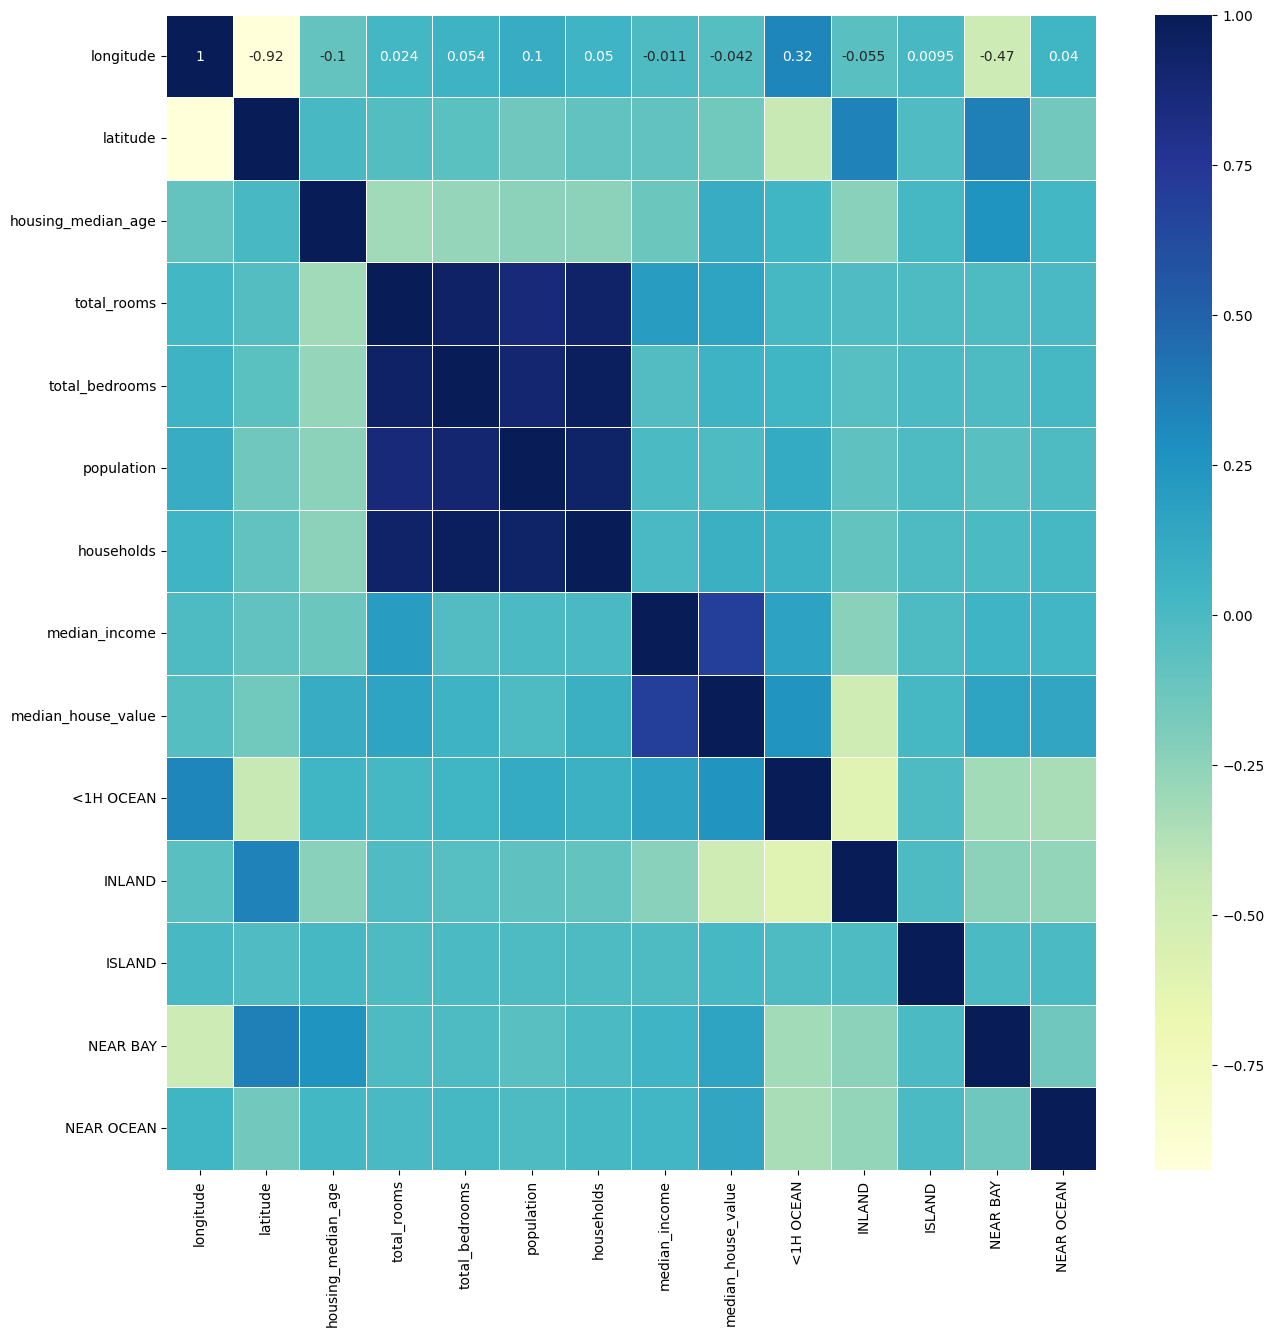

In [312]:
# Using a heat map to visualize the corrrelation matrix
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5, annot_kws={"size": 10})
plt.show()
# Inland, the price is way lower than close to the sea
#Closer to ocean = higher price

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

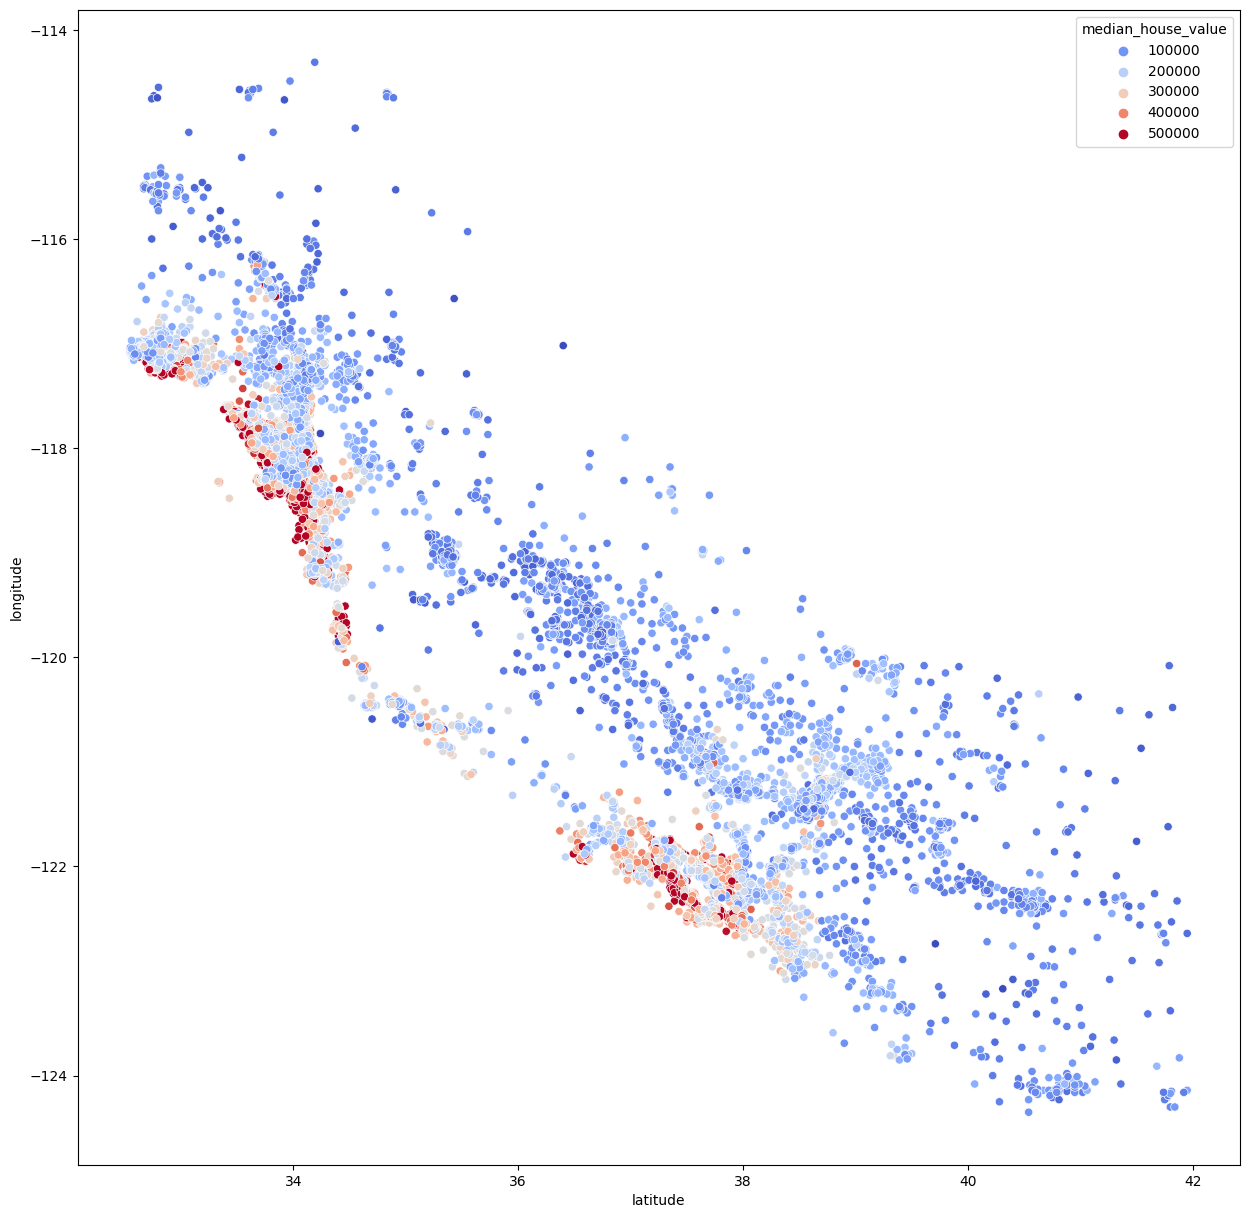

In [313]:
#This is for coordinate visualization
plt.figure(figsize=(15,15))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

# Blue is cheaper and red is the coast and it looks like the map of California

In [314]:
# How many rooms of the rooms presented are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

# If you have a block w more houses, you'll have more rooms so now:
# How many rooms of the rooms presented by house are bedrooms
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

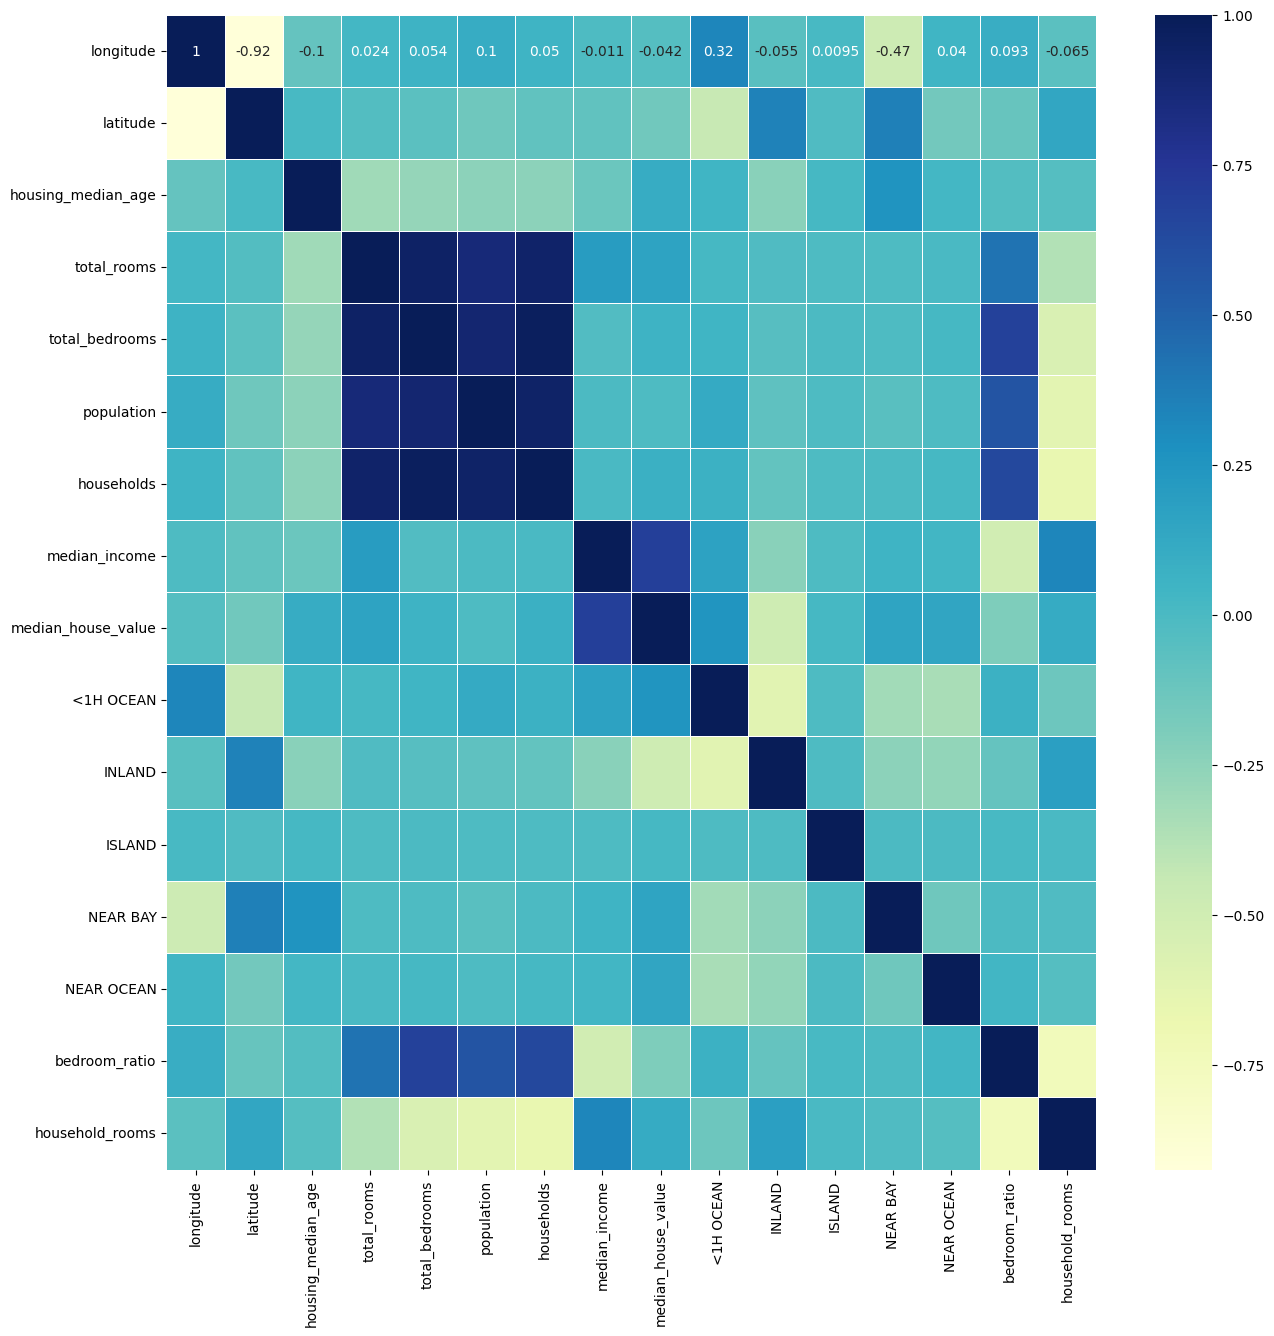

In [315]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5, annot_kws={"size": 10})
plt.show()

In [316]:
# Train a VERY simple linear model
from sklearn.linear_model import LinearRegression
# If we were to scale the data, the representations are all denoted with a suffix of s
#### from sklearn.preprocessing import StandardScaler

#### scaler = StandardScaler()

# We split the data a bit to early (in the above cells) but I'll keep it in. 
# Now we need to split the data again b/c we have new features

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
# give it X to train and then Y to train + tune
# It takes X, guesses the price and then we compare to Y and keep training until accurate

#### X_train_s = scaler.fit_transform(X_train) 

reg = LinearRegression() 

reg.fit(X_train, y_train) #Train the model
#### reg.fit(X_train_s, y_train)

LinearRegression()

In [317]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [318]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [319]:
#### X_test_s = scaler.transform(X_test)

In [323]:
reg.score(X_test, y_test)
# Regression score of 
#### reg.score(X_test_s, y_test)
# this may not work every run due to there being VERY FEW island homes.
# it is possible the testing data did not receive ANY island homes and that could impact this function.
# So run it again until it works

0.6651241862182791

In [324]:
# Now we're going to tune to find an optimal model
# In this case we're working with decision trees
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train,y_train) #Train the model

RandomForestRegressor()

In [325]:
forest.score(X_test,y_test)
# Straight of the bat we have a MUCH higher fit

0.8036638248633927

In [335]:
# Now we will use grid search and cross validation. 
# So we will take the data, we split it into k folds and use all but one fold to train and use the last one for testing
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor() #we don't want our fitted version from before
# Define a parameter grid for hyperparameter tuning using GridSearchCV.
param_grid = {
    "n_estimators": [100, 200, 300],            # Different numbers of decision trees in the random forest.
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

# Create a GridSearchCV object.
grid_search = GridSearchCV(
    forest,                                   # The machine learning model to be tuned (e.g., a Random Forest).
    param_grid,                               # The parameter grid defined above.
    cv=5,                                     # Number of cross-validation folds (k-fold cross-validation).
    scoring="neg_mean_squared_error",         # The scoring metric used to evaluate model performance.
    return_train_score=True                   # Whether to return training scores during the grid search.
)

grid_search.fit(X_train,y_train)
                           

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [338]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [339]:
grid_search.best_estimator_.score(X_test,y_test) 

0.805828561342895